In [2]:
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import colors as mcolors
import os
from datetime import datetime
import bisect 
import re
import numpy as np


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [3]:
def scanLog(csvlogpath, txt_to_search, txt_field, printit = False):
    with open(csvlogpath) as csvfile:
        print('SCANNING ' + csvlogpath)
        reader = csv.DictReader(csvfile)
        count = 0
        data = []
        
        for row in reader:
            is_ok = True
            for i in range(len(txt_field)):
                
                pattern = re.compile(txt_to_search[i])
                if pattern.match(row[txt_field[i]]):
                    is_ok = True
                else:
                    is_ok = False
                    break
            
            if is_ok:
                count += 1
                
                my_val = {}
                for i in range(len(txt_field)):
                    my_val[txt_field[i]] = row[txt_field[i]]
                #data.append(my_val)
                data.append(row)
            
        return {'count': count, 'value': data}
    
def plotLines(data,opt = {}, logit= False):
    for d in data:
        my_color = None
        if 'color' in opt:
            if d in opt['color']:
                my_color = opt['color'][d]

        my_width = None
        if 'width' in opt:
            if d in opt['width']:
                my_width = opt['width'][d]
        plt.plot(data[d]['x'],data[d]['y'], label=d, color=my_color, linewidth=my_width)
        if logit:
            plt.yscale('log')
            
        plt.xticks(data[d]['x'],[item.strftime('%Y-%m') for item in data[d]['x']])
    return plt


def plotBars(data,opt = {}, logit= False):
    
    x_groups = []
    bars_groups = []
    bars_legend = []
    
    for d_bar in data:
            bars_legend.append(d_bar)
            d = data[d_bar]
            #the x axis
            for index_x in range(0,len(d['x'])):
                x_val = d['x'][index_x]
                if x_val not in x_groups:
                    bisect.insort(x_groups, x_val)
                    bars_groups.append([])
                
                index_in_groups = x_groups.index(x_val)
                #insert same y val
                bars_groups[index_in_groups].append(d['y'][index_x])
        
    #return(x_groups, bars_groups)
    
    ind = np.arange(len(x_groups))    # the x locations for the groups
    width = 0.3     # the width of the bars: can also be len(x) sequence    
    fig, ax = plt.subplots()

    loop_width = width/len(bars_legend) 
    starting_from = ind - loop_width
    for bl_index in range(0,len(bars_legend)):
        y_vals = []
        for g in bars_groups:
            y_vals.append(g[bl_index])
    
        my_color = None
        if 'color' in opt:
            if bars_legend[bl_index] in opt['color']:
                my_color = opt['color'][bars_legend[bl_index]]
                
        rects1 = ax.bar(starting_from, tuple(y_vals), width, color=my_color, label= bars_legend[bl_index])
        
        if 'couple' in opt:
            if opt['couple'] == True:
                if ((bl_index & 1) == 1):
                        starting_from = starting_from + 2*loop_width 
        else:
            starting_from = starting_from + 2*loop_width 
                
        
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xticks(ind)
    x_groups = [item.strftime('%Y-%m') for item in x_groups]
    ax.set_xticklabels(tuple(x_groups))
    ax.legend()
    

    return plt
    #return plt

def plotPie(data,opt ={}, logit= False):
    
    #explode = (0.05, 0.05, 0.05, 0.05)
   #autopct='%1.1f%%' 
    fig1, ax1 = plt.subplots()
    ax1.pie(data['sizes'], labels=data['labels'])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    return plt
    

In [4]:
def buildData(txt_list, txt_field_list, csvpath, not_inc = []):
    data = {'x':[],'y':[],'value':[]}
    for filename in os.listdir(csvpath):
        if filename.endswith(".csv") and filename not in not_inc : 
            csvlogpath = csvpath+filename
            scanner = scanLog(csvlogpath,txt_list, txt_field_list)
            date = filename.replace("oc-", "").replace(".csv", "")

            date_val = datetime.strptime(date, '%Y-%m')
            bisect.insort(data['x'],date_val) 
            ord_index = data['x'].index(date_val)
            data['y'].insert(ord_index,scanner['count'])
            data['value'].insert(ord_index,scanner['value'])
        else:
            continue
        
    return data

In [8]:
csvpath = '/Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/'
#TIME,REMOTE_ADDR,HTTP_USER_AGENT,HTTP_REFERER(from),HTTP_HOST,REQUEST_URI(to)

In [9]:
#-------------------------------------------------------------------------------------------------#
#General usage of OSCAR on OCC and COCI
data_oscar = {}

In [10]:
data_oscar['COCI'] = buildData(['.*(\/coci\/search).*(text)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [12]:
data_oscar['OCC'] = buildData(["^(\/search).*(text)"], ["REQUEST_URI"], csvpath)

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [17]:
#Generate the .CSV file 
FILE_TO_EDIT = '/Users/ivan.heibi/phd/paper/OSCAR(Special-issue)-DataScience/article/data/gen.csv'
file_res = open(FILE_TO_EDIT,'w')  
file_res.write('dataset,date,accesses\n')
file_res.close()

for dataset_key in data_oscar:
    file_res = open(FILE_TO_EDIT,'a')
    for i in range(0,len(data_oscar[dataset_key]['x'])):
        file_res.write(dataset_key+','+data_oscar[dataset_key]['x'][i].strftime('%m-%d-%Y')+','+str(data_oscar[dataset_key]['y'][i])+'\n')
    file_res.close()

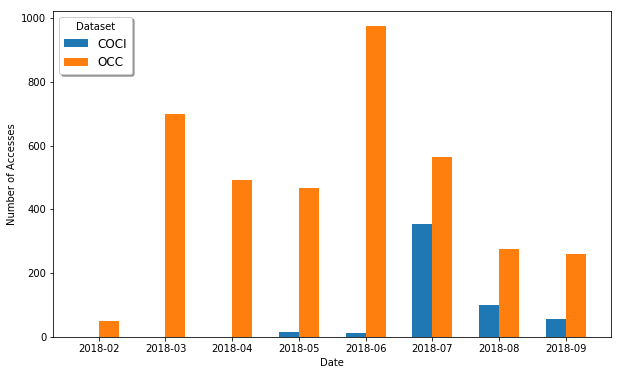

In [92]:
my_plt = plotBars(data_oscar)
my_plt.legend(loc='upper left', shadow=True, fontsize='large', title='Dataset')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.rcParams['figure.figsize'] = (10,6)
my_plt.show()

In [18]:
#-------------------------------------------------------------------------------------------------#
#Category search on OSCAR for OCC 
data_category_oscar = {}

In [19]:
data_category_oscar['Authors'] = buildData(['.*(/search).*(rule=author_lname|rule=author_fname|rule=orcid)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [20]:
data_category_oscar['Documents'] = buildData(['.*(/search).*(rule=author_text|rule=doi|rule=any_text)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [22]:
data_category_oscar['Authors']

{'x': [datetime.datetime(2018, 2, 1, 0, 0),
  datetime.datetime(2018, 3, 1, 0, 0),
  datetime.datetime(2018, 4, 1, 0, 0),
  datetime.datetime(2018, 5, 1, 0, 0),
  datetime.datetime(2018, 6, 1, 0, 0),
  datetime.datetime(2018, 7, 1, 0, 0),
  datetime.datetime(2018, 8, 1, 0, 0),
  datetime.datetime(2018, 9, 1, 0, 0)],
 'y': [0, 67, 107, 40, 190, 113, 61, 47],
 'value': [[],
  [OrderedDict([('TIME', '2018-03-22 10:57:40,486'),
                ('REMOTE_ADDR', '137.204.150.20'),
                ('HTTP_USER_AGENT',
                 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:58.0) Gecko/20100101 Firefox/58.0'),
                ('HTTP_REFERER', 'http://opencitations.net/search'),
                ('HTTP_HOST', 'opencitations.net'),
                ('REQUEST_URI',
                 '/search?text=Peroni&rule=author_lname&bc_4=and&text=Silvio&rule=author_fname')]),
   OrderedDict([('TIME', '2018-03-22 10:57:54,682'),
                ('REMOTE_ADDR', '137.204.150.20'),
                ('HTTP_U

In [23]:
#Generate the .CSV file 
FILE_TO_EDIT = '/Users/ivan.heibi/phd/paper/OSCAR(Special-issue)-DataScience/article/data/category.csv'
file_res = open(FILE_TO_EDIT,'w')  
file_res.write('category,date,accesses\n')
file_res.close()

for dataset_key in data_category_oscar:
    file_res = open(FILE_TO_EDIT,'a')
    for i in range(0,len(data_category_oscar[dataset_key]['x'])):
        file_res.write(dataset_key+','+data_category_oscar[dataset_key]['x'][i].strftime('%m-%d-%Y')+','+str(data_category_oscar[dataset_key]['y'][i])+'\n')
    file_res.close()

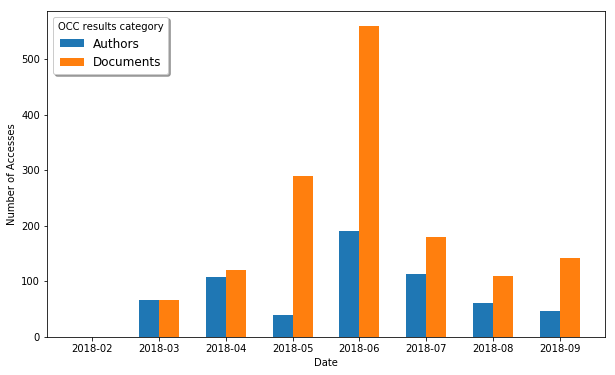

In [96]:
my_plt = plotBars(data_category_oscar)
my_plt.legend(loc='upper left', shadow=True, fontsize='large', title='OCC results category')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.rcParams['figure.figsize'] = (10,6)
my_plt.show()

In [24]:
#-------------------------------------------------------------------------------------------------#
#ADV usage of OSCAR on OCC and COCI
data_adv_oscar = {}

In [25]:
data_adv_oscar['COCI'] = buildData(['.*(/coci/search).*(bc)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [26]:
data_adv_oscar['OCC'] = buildData(['.*(/search).*(bc)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [27]:
#Generate the .CSV file 
FILE_TO_EDIT = '/Users/ivan.heibi/phd/paper/OSCAR(Special-issue)-DataScience/article/data/advanced.csv'
file_res = open(FILE_TO_EDIT,'w')  
file_res.write('category,date,accesses\n')
file_res.close()

for dataset_key in data_adv_oscar:
    file_res = open(FILE_TO_EDIT,'a')
    for i in range(0,len(data_adv_oscar[dataset_key]['x'])):
        file_res.write(dataset_key+','+data_adv_oscar[dataset_key]['x'][i].strftime('%m-%d-%Y')+','+str(data_adv_oscar[dataset_key]['y'][i])+'\n')
    file_res.close()

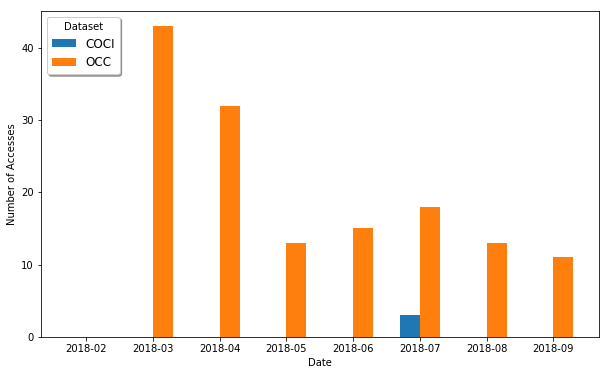

In [100]:
my_plt = plotBars(data_adv_oscar)
my_plt.legend(loc='upper left', shadow=True, fontsize='large', title='Dataset')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.rcParams['figure.figsize'] = (10,6)
my_plt.show()

In [28]:
#-------------------------------------------------------------------------------------------------#
#Category search on OSCAR for COCI
data_category_oscar_coci = {}

In [29]:
data_category_oscar_coci['Citing entity'] = buildData(['.*(\/coci\/search).*(rule=citingdoi)'], ['REQUEST_URI'], csvpath, not_inc = ['oc-2018-02.csv','oc-2018-03.csv'])

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [30]:
data_category_oscar_coci['Cited entity'] = buildData(['.*(\/coci\/search).*(rule=citeddoi)'], ['REQUEST_URI'], csvpath, not_inc = ['oc-2018-02.csv','oc-2018-03.csv'])

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [31]:
data_category_oscar_coci['OCI'] = buildData(['.*(\/coci\/search).*(rule=oci)'], ['REQUEST_URI'], csvpath, not_inc = ['oc-2018-02.csv','oc-2018-03.csv'])

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [32]:
#Generate the .CSV file 
FILE_TO_EDIT = '/Users/ivan.heibi/phd/paper/OSCAR(Special-issue)-DataScience/article/data/coci.csv'
file_res = open(FILE_TO_EDIT,'w')  
file_res.write('category,date,accesses\n')
file_res.close()

for dataset_key in data_category_oscar_coci:
    file_res = open(FILE_TO_EDIT,'a')
    for i in range(0,len(data_category_oscar_coci[dataset_key]['x'])):
        file_res.write(dataset_key+','+data_category_oscar_coci[dataset_key]['x'][i].strftime('%m-%d-%Y')+','+str(data_category_oscar_coci[dataset_key]['y'][i])+'\n')
    file_res.close()

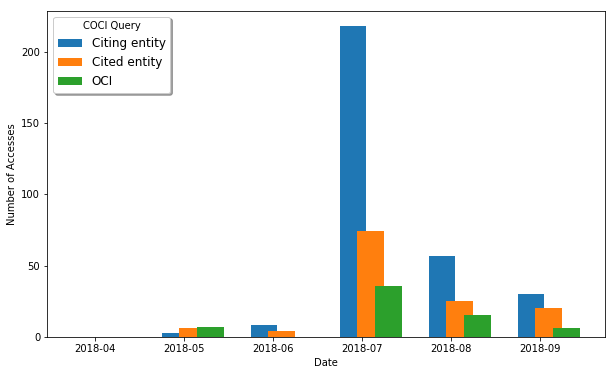

In [105]:
my_plt = plotBars(data_category_oscar_coci)
my_plt.legend(loc='upper left', shadow=True, fontsize='large', title='COCI Query')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.rcParams['figure.figsize'] = (10,6)
my_plt.show()

In [33]:
#-------------------------------------------------------------------------------------------------#
#Category search move to browser
data_browser = {}

In [34]:
data_browser['OCC'] = buildData([".*(net\/search).*",".*(\/browse).*"], ["HTTP_REFERER","REQUEST_URI"], csvpath)

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [35]:
data_browser['COCI'] = buildData([".*(coci\/search).*",".*(coci\/browse).*"], ["HTTP_REFERER","REQUEST_URI"], csvpath)

SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/phd/paper/the_SCI_framework/data/log_data/csv/oc-2018-09.csv


In [36]:
data_oscar_with_moves = {
    'OCC': data_oscar['OCC'],
    'OCC:browse': data_browser['OCC'],
    'COCI': data_oscar['COCI'],
    'COCI:browse': data_browser['COCI'],
}


In [37]:
#Generate the .CSV file 
FILE_TO_EDIT = '/Users/ivan.heibi/phd/paper/OSCAR(Special-issue)-DataScience/article/data/moves.csv'
file_res = open(FILE_TO_EDIT,'w')  
file_res.write('category,date,accesses\n')
file_res.close()

for dataset_key in data_oscar_with_moves:
    file_res = open(FILE_TO_EDIT,'a')
    for i in range(0,len(data_oscar_with_moves[dataset_key]['x'])):
        file_res.write(dataset_key+','+data_oscar_with_moves[dataset_key]['x'][i].strftime('%m-%d-%Y')+','+str(data_oscar_with_moves[dataset_key]['y'][i])+'\n')
    file_res.close()

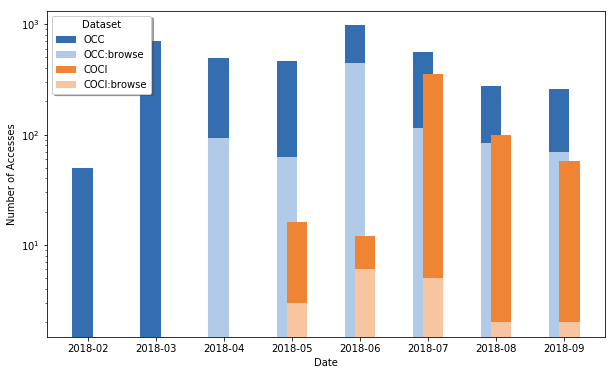

In [158]:
opt_color = {
    'OCC': '#346eb0',
    'OCC:browse': '#b0cae8',
    'COCI': '#ef8434',
    'COCI:browse': '#f7c6a1'
}
my_plt = plotBars(data_oscar_with_moves, opt = {'couple':True, 'color': opt_color})
my_plt.legend(loc='best', shadow=True, fontsize='medium', title='Dataset')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.yscale('log')
my_plt.rcParams['figure.figsize'] = (10,6)
my_plt.show()